In [11]:
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
import numpy as np
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import numpy as np
import numpy as np
import scipy.spatial.distance
import scipy.spatial as spatial

In [6]:
vec1 = np.random.rand(40)
vec2 = np.random.rand(40)
vec3 = np.random.rand(40)
vec4 = np.random.rand(40)
vec5 = np.random.rand(40)

In [18]:
vec1

array([ 0.73706165,  0.77512722,  0.07822038,  0.93451816,  0.26761602,
        0.99415744,  0.76757846,  0.22712572,  0.06698432,  0.62444672,
        0.32099988,  0.62060696,  0.62425252,  0.34102821,  0.94916978,
        0.19257429,  0.27109786,  0.3781454 ,  0.20024675,  0.82726398,
        0.54171448,  0.91832079,  0.93998416,  0.36284763,  0.01311139,
        0.40933665,  0.43061361,  0.46026978,  0.68593503,  0.71105623,
        0.43236811,  0.02798578,  0.6424936 ,  0.22995749,  0.53811544,
        0.87062517,  0.73775167,  0.062315  ,  0.9810711 ,  0.50896798])

In [19]:
vec2

array([ 0.07521498,  0.23182738,  0.43172126,  0.04940246,  0.78564623,
        0.39700854,  0.74824759,  0.44428799,  0.42973064,  0.7757046 ,
        0.57798969,  0.41821577,  0.31878293,  0.20695613,  0.78148938,
        0.03751858,  0.6622256 ,  0.26394056,  0.60658632,  0.71577711,
        0.49788463,  0.14482612,  0.94641335,  0.90169856,  0.92236178,
        0.7110736 ,  0.75455421,  0.55948569,  0.0734272 ,  0.91741554,
        0.00515277,  0.04893241,  0.75196524,  0.87475087,  0.25298563,
        0.06107809,  0.53497166,  0.63845654,  0.33067644,  0.31940708])

In [36]:
list_ = [vec1,vec2,vec3,vec4,vec5]
arr = np.array(list_)

In [29]:
arr = np.array([vec1,vec2,vec3,vec4,vec5])
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(arr)

In [37]:
x = Y[:, 0]
y = Y[:, 1]

In [38]:
x

array([ -47.67924118,  283.86962891, -258.69299316,  164.67948914,
       -117.37225342], dtype=float32)

In [30]:
for y in Y

array([[ -47.67924118, -282.93502808],
       [ 283.86962891, -199.07606506],
       [-258.69299316,  -29.72157669],
       [ 164.67948914,  109.23685455],
       [-117.37225342,  281.68313599]], dtype=float32)

In [34]:
model = {'vec1':vec1, 'vec2':vec2, 'vec3':vec3, 'vec4':vec4, 'vec5':vec5}

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,40), dtype='f')
    word_labels = [word]

    # get close words
    close_words = ['vec1','vec2','vec3','vec5']
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score]
        word_labels.append(wrd_score)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    #print("arr=> ",arr)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.0005, x_coords.max()+0.0005)
    plt.ylim(y_coords.min()+0.0005, y_coords.max()+0.0005)
    plt.show()

<IPython.core.display.Javascript object>


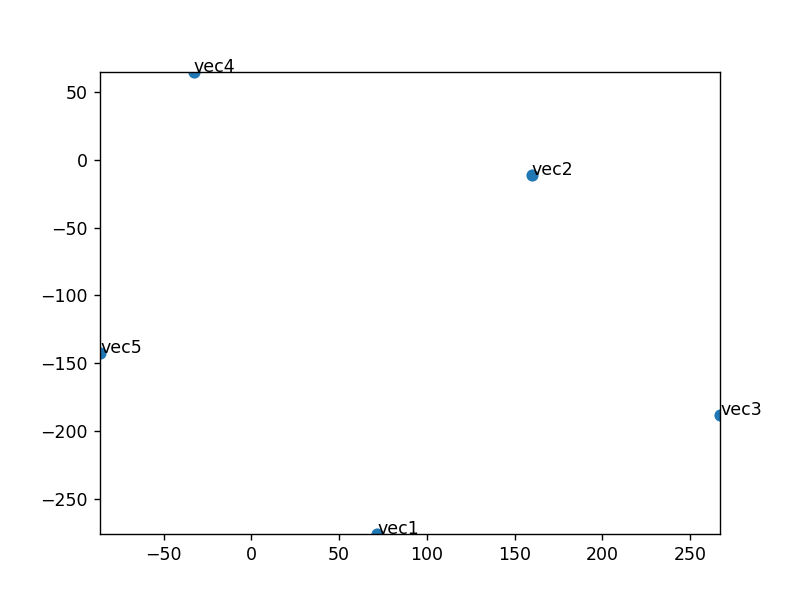

In [35]:
display_closestwords_tsnescatterplot(model, 'vec4')

## Reading json file:

In [10]:
with open("/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/test_dict_english.p","rb") as file:
    english_data = cPickle.load(file, encoding='latin1')

In [11]:
with open("/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/test_dict_german.p","rb") as file:
    german_data = cPickle.load(file, encoding='latin1')

In [12]:
with open("/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/test_dict_french.p","rb") as file:
    french_data = cPickle.load(file, encoding='latin1')

In [13]:
with open("/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/test_dict_italian.p","rb") as file:
    italian_data = cPickle.load(file, encoding='latin1')

In [25]:
languages = len(english_data)* ['en'] + len(german_data)* ['de'] + len(french_data)* ['fr'] + len(italian_data)* ['it']
vectors_english = [english['vec'] for english in english_data]
vectors_german = [german['vec'] for german in german_data]
vectors_french = [french['vec'] for french in french_data]
vectors_italian = [italian['vec'] for italian in italian_data]
vectors = vectors_english + vectors_german + vectors_french + vectors_italian
labels_english = [english['true_label'] for english in english_data]
labels_german = [german['true_label'] for german in german_data]
labels_french = [french['true_label'] for french in french_data]
labels_italian = [italian['true_label'] for italian in italian_data]
labels = labels_english + labels_german + labels_french + labels_italian

In [9]:
len(vectors_english)

NameError: name 'vectors_english' is not defined

In [19]:
from sklearn.manifold import TSNE
import numpy as np
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=40)
arr = np.array(vectors_italian)
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))

### Perplexity = 40   n_iter = 1000:

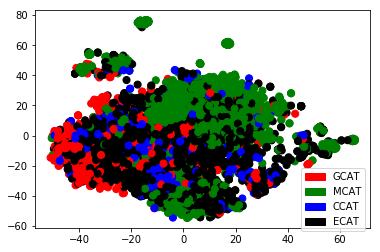

In [20]:
labels = labels_italian
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### French:

In [21]:
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=40)
arr = np.array(vectors_french)
Y_fr = tsne.fit_transform(arr)
x_fr = list(Y_fr[:, 0].astype(np.float))
y_fr = list(Y_fr[:, 1].astype(np.float))

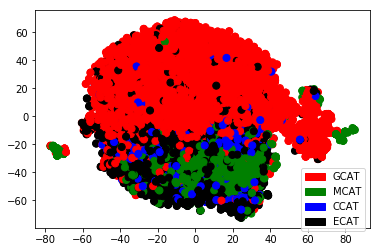

In [22]:
labels = labels_french
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x_fr, y_fr, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Perplexity = 5    n_iter=250:

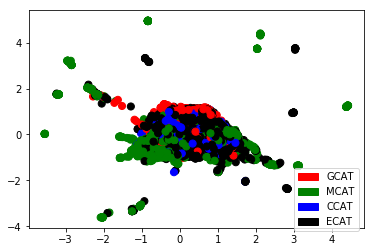

In [12]:
labels = labels_italian
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Perplexity = 10:

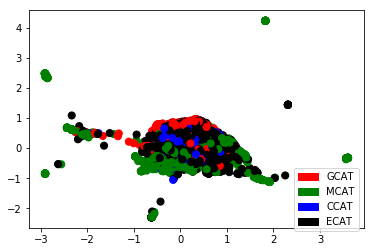

In [18]:
labels = labels_italian
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Perplexity = 30:

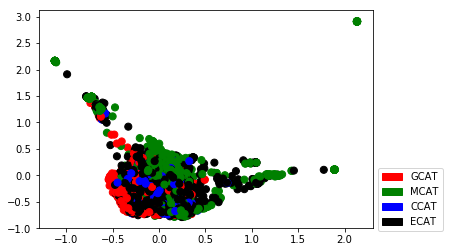

In [16]:
labels = labels_italian
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Perplexity = 50:

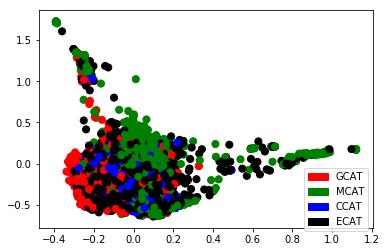

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
labels = labels_italian
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Over all vectors:

In [24]:
from sklearn.manifold import TSNE
import numpy as np
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=40)
arr = np.array(vectors)
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))

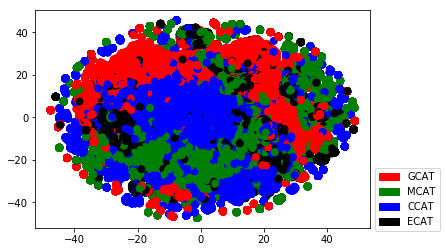

In [28]:
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

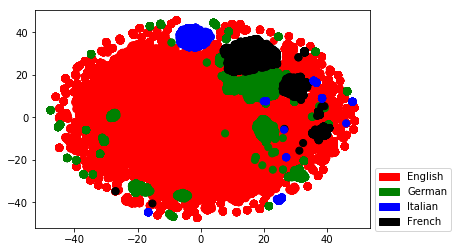

In [31]:
key = {'en': ('red', 'English'), 'de': ('green', 'German'),
       'it': ('blue', 'Italian'), 'fr':('black','French') }
plt.scatter(x, y, c=[key[index][0] for index in languages], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### TSNE as they were sampled:

In [2]:
import json
path_json = "/Users/MeryemMhamdi/EPFL/Spring2018/Thesis/3AlgorithmsImplementation/demo/static/all_languages_mlp_demo.json"
data = json.load(open(path_json))

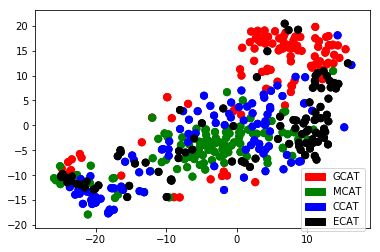

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

labels = data['en']['marker']['symbol']
key = {'circle': ('red', 'GCAT'), 'square': ('green', 'MCAT'),
       'diamond': ('blue', 'CCAT'), 'cross':('black','ECAT') }
plt.scatter(data['en']['x'], data['en']['y'], c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

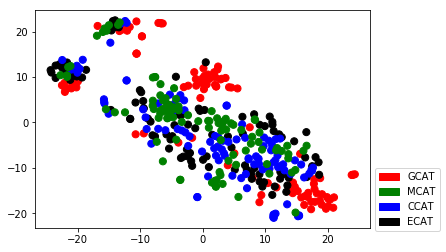

In [12]:
labels = data['de']['marker']['symbol']
key = {'circle': ('red', 'GCAT'), 'square': ('green', 'MCAT'),
       'diamond': ('blue', 'CCAT'), 'cross':('black','ECAT') }
plt.scatter(data['de']['x'], data['de']['y'], c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

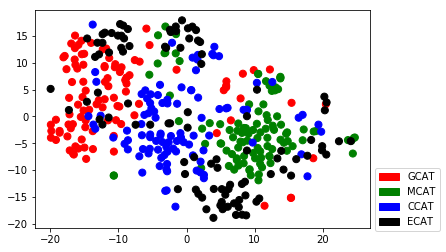

In [13]:
labels = data['it']['marker']['symbol']
key = {'circle': ('red', 'GCAT'), 'square': ('green', 'MCAT'),
       'diamond': ('blue', 'CCAT'), 'cross':('black','ECAT') }
plt.scatter(data['it']['x'], data['it']['y'], c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

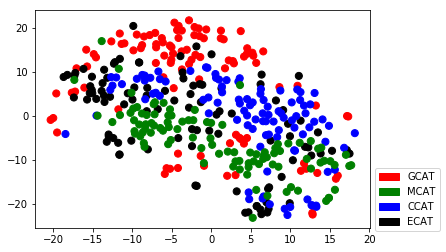

In [15]:
labels = data['fr']['marker']['symbol']
key = {'circle': ('red', 'GCAT'), 'square': ('green', 'MCAT'),
       'diamond': ('blue', 'CCAT'), 'cross':('black','ECAT') }
plt.scatter(data['fr']['x'], data['fr']['y'], c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

In [124]:
vectors = []
languages = []
classes = []
x_list = []
y_list = []
text_list = []
for lang in data:
    for i in range(0,len(data[lang]['x'])):
        x_list.append(data[lang]['x'][i])
        y_list.append(data[lang]['y'][i])
        text_list.append(data[lang]['text'][i])
        vectors.append([data[lang]['x'][i],data[lang]['y'][i]])
        languages.append(lang)
        classes.append(data[lang]['marker']['symbol'][i])

### Compute Cosine Similarity between documents:

In [39]:
def cos_cdist(matrix, vector):
    """
    Compute the cosine distances between each row of matrix and vector.
    """
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine').reshape(-1)

In [50]:
similarity_scores = []
matrix = np.array(vectors)
for i in range(0,len(vectors)):
    vector = np.array(vectors[i])
    similarity_scores.append(cos_cdist(matrix, vector))

In [55]:
similarity_scores[0]

array([ 0.        ,  0.16575418,  1.9844101 , ...,  0.67796288,
        0.00097915,  0.13051526])

### Find the nearest neighbors based on the cosine similarity and their belonging to the same class and keep only documents which have nearest neighbors:

In [189]:
indices = []
classes_neighbors = {}
for i in range(0,len(vectors)):
    indices_sub = []
    for j in range(0,len(similarity_scores[i])):
        if similarity_scores[i][j] > 1.999999 and classes[i] == classes[j]:
            if classes[i] not in classes_neighbors:
                classes_neighbors.update({classes[i]:[j]})
            else:
                list_ = classes_neighbors[classes[i]]
                list_.append(j)
                classes_neighbors.update({classes[i]:list_})
            indices_sub.append(j)
    indices.append(indices_sub)

In [1]:
classes_neighbors.keys()

NameError: name 'classes_neighbors' is not defined

In [191]:
len(set(classes_neighbors['circle']))

39

In [192]:
len(set(classes_neighbors['cross']))

70

In [193]:
len(set(classes_neighbors['diamond']))

70

In [194]:
len(set(classes_neighbors['square']))

56

In [182]:
indices[1]

[]

In [195]:
indices_flat = [item for sublist in indices for item in sublist]
len(set(indices_flat))

235

In [196]:
list(set(indices_flat))

[1536,
 1029,
 1030,
 1031,
 1544,
 8,
 15,
 16,
 1039,
 1554,
 1043,
 1042,
 536,
 1562,
 1052,
 31,
 33,
 1573,
 1577,
 1065,
 1579,
 45,
 48,
 1586,
 1075,
 55,
 56,
 1081,
 1082,
 1591,
 1088,
 65,
 1093,
 584,
 1097,
 74,
 586,
 80,
 593,
 82,
 87,
 91,
 1115,
 1120,
 1121,
 96,
 611,
 614,
 1127,
 616,
 105,
 106,
 618,
 111,
 112,
 1137,
 626,
 1138,
 117,
 631,
 122,
 634,
 637,
 641,
 1160,
 649,
 138,
 648,
 653,
 1169,
 657,
 659,
 1171,
 1170,
 149,
 151,
 153,
 1179,
 1180,
 669,
 157,
 1185,
 161,
 165,
 167,
 168,
 1193,
 171,
 1197,
 1198,
 174,
 1200,
 177,
 691,
 1204,
 694,
 183,
 696,
 184,
 187,
 188,
 701,
 702,
 1216,
 706,
 194,
 708,
 712,
 200,
 714,
 201,
 203,
 205,
 206,
 1230,
 1234,
 723,
 731,
 219,
 734,
 223,
 227,
 229,
 230,
 1256,
 745,
 747,
 1263,
 752,
 242,
 755,
 246,
 249,
 252,
 765,
 767,
 770,
 773,
 1287,
 276,
 791,
 1303,
 281,
 1306,
 795,
 285,
 287,
 288,
 803,
 292,
 1322,
 811,
 1324,
 1325,
 300,
 303,
 1327,
 305,
 1331,
 1332,
 3

### build new json file:

In [197]:
indices_list = list(set(indices_flat))
json_new = {}
dict_lang = {'English':'en'}
for i in range(0,len(indices_list)):
    if languages[i] not in json_new:
        x = [x_list[i]]
        y = [y_list[i]]
        text = [text_list[i]]
        name = languages[i]
        symbol = [classes[i]]
        dict_ = {'x':x, 'y':y,
                 'mode': 'markers',
                 'type': 'scatter',
                 'name': name,
                 'text':text, 
                 'marker': {'size': 20, 'symbol': symbol}
                  }
        json_new.update({languages[i]: dict_ })
    else:
        dict_ = json_new[languages[i]]
        dict_['x'].append(x_list[i])
        dict_['y'].append(y_list[i])
        dict_['text'].append(text_list[i])
        dict_['marker']['symbol'].append(classes[i])
        json_new.update({languages[i]: dict_ })                         

In [186]:
languages[1]

'de'

In [198]:
json_new.keys()

dict_keys(['de'])

In [188]:
with open('/Users/MeryemMhamdi/EPFL/Spring2018/Thesis/3AlgorithmsImplementation/demo/static/all_languages_mlp_more_visual_demo.json', 'w') as outfile:
    json.dump(json_new, outfile)

## Running TSNE over the document vectors produced from fine tuning MLP:

In [3]:
results_dir = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/MLPFineModels_RCV/"

with open(results_dir+"en,de,fr,it_multiSkip_40_normalized_results.p","rb") as results_file:
    dict_results_en = cPickle.load(results_file, encoding='latin1')

In [1]:
dict_results_en.keys()

NameError: name 'dict_results_en' is not defined

In [6]:
dict_results_en['activations_en']

159629

In [17]:
languages = len(english_data)* ['en'] + len(german_data)* ['de'] + len(french_data)* ['fr'] + len(italian_data)* ['it']
vectors_english = dict_results_en['activations_en']
vectors_german = dict_results_en['activations_de']
vectors_french = dict_results_en['activations_fr']
vectors_italian = dict_results_en['activations_it']
vectors = np.concatenate((vectors_english, vectors_german, vectors_french, vectors_italian), axis=0)
labels_english = [english['true_label'] for english in english_data]
labels_german = [german['true_label'] for german in german_data]
labels_french = [french['true_label'] for french in french_data]
labels_italian = [italian['true_label'] for italian in italian_data]
labels = labels_english + labels_german + labels_french + labels_italian

### Projection of French Vectors:

In [28]:
tsne = TSNE(n_components=2, verbose=1, random_state=0, n_iter=250, perplexity=20)
arr = np.array(vectors_french)
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 13471 samples in 0.716s...
[t-SNE] Computed neighbors for 13471 samples in 43.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13471
[t-SNE] Computed conditional probabilities for sample 2000 / 13471
[t-SNE] Computed conditional probabilities for sample 3000 / 13471
[t-SNE] Computed conditional probabilities for sample 4000 / 13471
[t-SNE] Computed conditional probabilities for sample 5000 / 13471
[t-SNE] Computed conditional probabilities for sample 6000 / 13471
[t-SNE] Computed conditional probabilities for sample 7000 / 13471
[t-SNE] Computed conditional probabilities for sample 8000 / 13471
[t-SNE] Computed conditional probabilities for sample 9000 / 13471
[t-SNE] Computed conditional probabilities for sample 10000 / 13471
[t-SNE] Computed conditional probabilities for sample 11000 / 13471
[t-SNE] Computed conditional probabilities for sample 12000 / 13471
[t-SNE] Computed conditional probabilities for sa

<IPython.core.display.Javascript object>


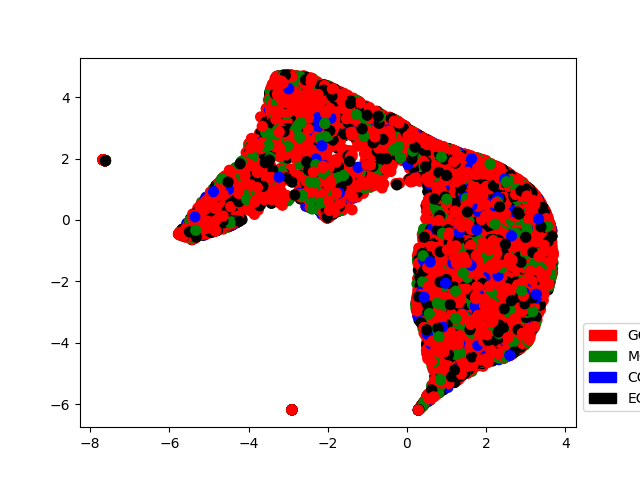

In [29]:
labels = labels_french
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Projection of All Vectors:

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0, n_iter=250, perplexity=20)
arr = np.array(vectors)
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 193231 samples in 165.949s...


In [ ]:
labels = labels
key = {'GCAT': ('red', 'GCAT'), 'MCAT': ('green', 'MCAT'),
       'CCAT': ('blue', 'CCAT'), 'ECAT':('black','ECAT') }
plt.scatter(x, y, c=[key[index][0] for index in labels], s=50)
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

### Sampling:

In [ ]:
test_dict_list_lang = {}
for language in test_dict_list:
    test_dict_list_class = {}
    for i in range(0, len(test_dict_list[language])):
        label = test_dict_list[language][i]['true_label']
        if label in test_dict_list_class:
            values = test_dict_list_class[label]
            values.append({'text': test_dict_list[language][i]['text'], 'vec': test_dict_list[language][i]['vec'], 'true_label': test_dict_list[language][i]['true_label']})
            test_dict_list_class.update({label: values})
        else:
            values = [{'text': test_dict_list[language][i]['text'], 'vec':test_dict_list[language][i]['vec'], 'true_label': test_dict_list[language][i]['true_label']}]
            test_dict_list_class.update({label: values})
    test_dict_list_lang.update({language:test_dict_list_class})

array([ 5.80167669,  9.48705068,  8.12225281,  0.09126801,  7.18067014,
        9.8025713 ,  8.30141098,  5.07188043,  7.66737607,  0.57120049,
        7.43154348,  5.95750035,  7.16665492,  4.95602528,  1.43126743,
        7.61200111,  0.6387074 ,  6.20538701,  4.8854722 ,  1.50590856,
        1.75022615,  6.06274368,  0.95142898,  7.39048779,  0.84730468,
        6.02782161,  2.23363004,  3.82837386,  3.5024706 ,  5.7657834 ,
        7.38492329,  7.99808971,  1.18769462,  8.3847868 ,  4.7305195 ,
        7.65938719,  3.04921871,  3.59218851,  9.64460204,  4.44839831])

In [63]:
vectors = []
for i in range(0,100):
    vectors.append(np.random.rand(40))
points = np.array(vectors)
point_tree = spatial.cKDTree(points)

# find the neighbours of each point
neighbours = point_tree.query_ball_point(vectors[0], 2.3)
colors = []
for i in range(0,100):
    if i in neighbours:
        colors.append('red')
    else:
        colors.append('blue')

In [80]:
neighbours[2]

27

In [64]:
len(neighbours)

14

In [76]:
tsne = TSNE(n_components=3, random_state=0, n_iter=300, perplexity=40)
arr = np.array(vectors)
Y = tsne.fit_transform(arr)
x = list(Y[:, 0].astype(np.float))
y = list(Y[:, 1].astype(np.float))
z = list(Y[:, 2].astype(np.float))

<IPython.core.display.Javascript object>


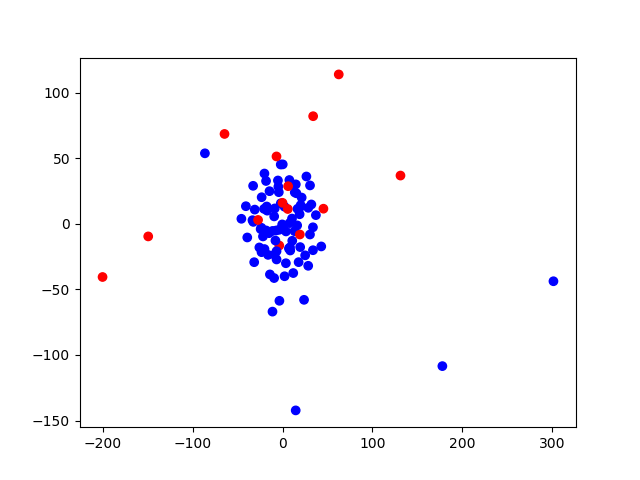

In [77]:
plt.scatter(x, y, c=colors)
#patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
#plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()